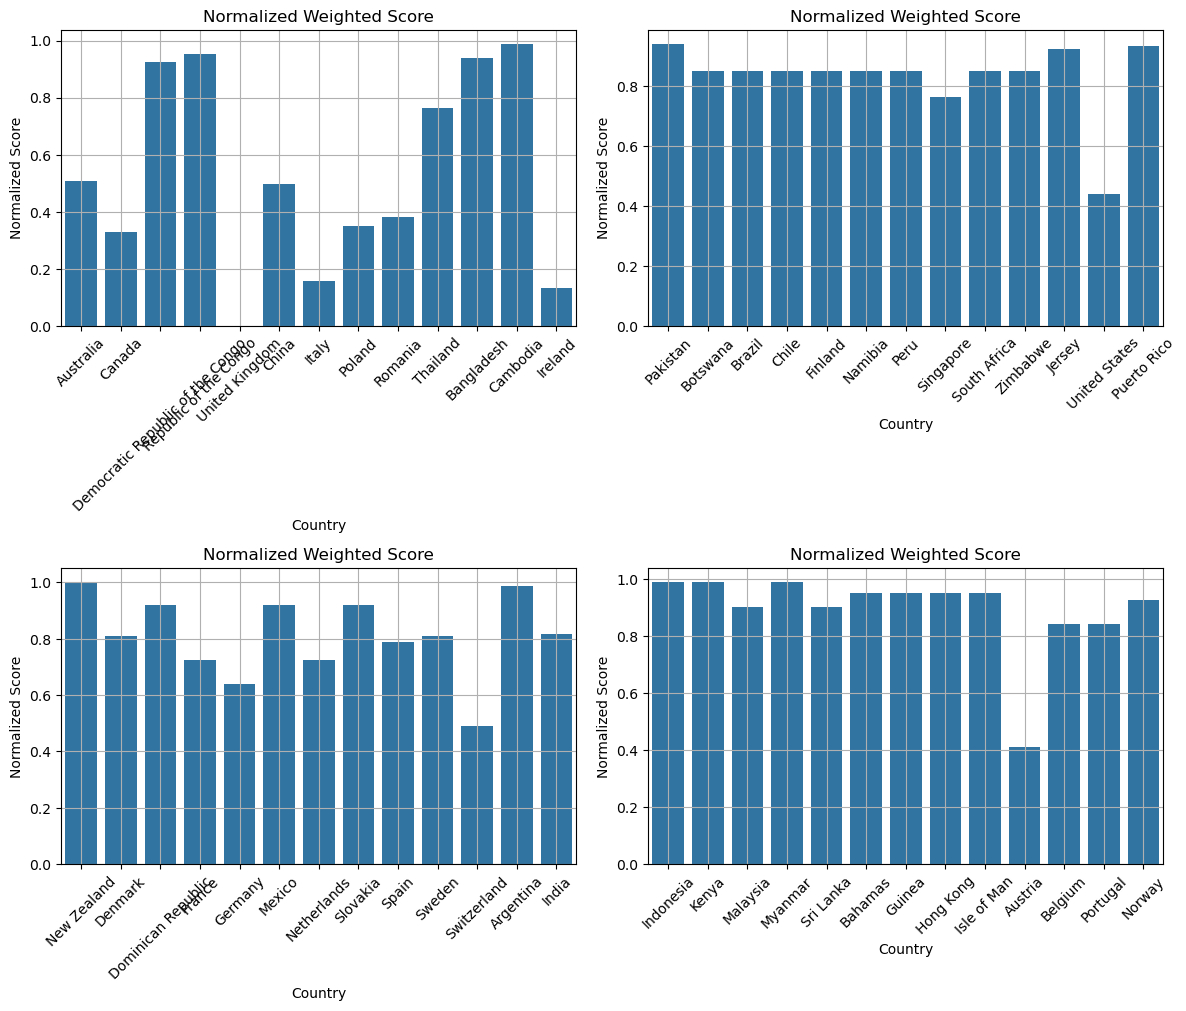

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
file_path = 'country_weighted_child_labor_scores.xlsx'
df = pd.read_excel(file_path)

# Drop rows where Weighted_Score is NaN
df = df.dropna(subset=['Weighted_Score'])

# Min-Max normalization
df['Normalized_Score'] = (df['Weighted_Score'] - df['Weighted_Score'].min()) / (df['Weighted_Score'].max() - df['Weighted_Score'].min())

# Visualization settings
num_plots = 13  # Number of countries to display in each plot
cols = 2  # Number of plots per row
rows = (len(df) + num_plots - 1) // num_plots  # Calculate the required number of rows

# Create figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))  # Set figure size
axes = axes.flatten()  # Flatten the 2D array for easier access

# Plot the normalized score for each country
for i in range(len(axes)):
    subset = df.iloc[i * num_plots:(i + 1) * num_plots]
    
    if not subset.empty:  # Ensure subset is not empty
        sns.barplot(x='Country', y='Normalized_Score', data=subset, ax=axes[i])
        axes[i].set_title('Normalized Weighted Score')
        axes[i].set_ylabel('Normalized Score')
        axes[i].set_xlabel('Country')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid()

# Hide any extra subplots
for j in range(len(df) // num_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.savefig('normalized_weighted_scores_subplot.png')  # Save image file
plt.show()
